<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 100px">

# Capstone Project: Classifying Logistics Research Papers
## Part 6 : Model Evaluation

---

 [Part 1: Get Text](01.Get_Text.ipynb) | [Part 2: Add Label](02.Add_Label.ipynb) | [Part 3: EDA](03.EDA.ipynb) | [Part 4: Gridsearch Classification](04.Gridsearch_Classification.ipynb) | [Part 5: NeuralNet Classification](05.NeuralNet_Classification.ipynb) | **Part 6: Model Evaluation** | [Part 7: Final Model](07.Final_Model.ipynb) 

---

### Introduction
This notebook evaluates two approaches for text classification model tuning and optimization:

1. **Traditional Machine Learning Models**
    - Includes SVM, Naive Bayes, and Gradient Boosting.
    - Utilizes TfidfVectorizer for text preprocessing, with GridSearchCV used to optimize both vectorizer and model hyperparameters.

2. **Neural Network with Class Imbalance Handling**
    - Text is preprocessed with `TfidfVectorizer`, and hyperparameters are tuned for optimal performance.

This evaluation compares the two approaches to identify the best-performing method for the text classification task.

### Import Library

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
nn_score = pd.read_csv('../data/nn_score.csv')
nn_score

,classifier,tokenizer,max_features,max_df,accuracy
0,neural network,thai_preprocess,5000,0.8,0.735294
1,neural network,thai_preprocess,5000,0.9,0.725490
2,neural network,thai_preprocess,7000,0.9,0.715686
3,neural network,thai_preprocess,No Max Features,0.9,0.696078
4,neural network,wangchan,7000,0.8,0.696078
5,neural network,wangchan,No Max Features,0.9,0.696078
6,neural network,wangchan,5000,0.8,0.676471
7,neural network,wangchan,No Max Features,0.8,0.676471
8,neural network,wangchan,7000,0.9,0.666667
9,neural network,thai_preprocess,No Max Features,0.8,0.647059


In [14]:
gs_score = pd.read_csv('../data/gridsearch_score.csv')
gs_score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__kernel,param_tfidf__max_df,param_tfidf__max_features,params,split0_test_score,...,split2_test_score,mean_test_score,std_test_score,rank_test_score,classifier,tokenizer,param_classifier__alpha,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators
0,0.236482,0.017402,0.078355,0.005809,1.0,linear,0.8,5000,"{'classifier__C': 1, 'classifier__kernel': 'li...",0.525,...,0.531646,0.525211,0.00517,13,svm,thai_preprocess,NaN,NaN,NaN,NaN
1,0.228827,0.016699,0.066779,0.002901,1.0,linear,0.8,7000,"{'classifier__C': 1, 'classifier__kernel': 'li...",0.525,...,0.531646,0.525211,0.00517,13,svm,thai_preprocess,NaN,NaN,NaN,NaN
2,0.202313,0.014212,0.067912,0.002721,1.0,linear,0.8,No Max Features,"{'classifier__C': 1, 'classifier__kernel': 'li...",0.525,...,0.531646,0.525211,0.00517,13,svm,thai_preprocess,NaN,NaN,NaN,NaN
3,0.225016,0.008092,0.071555,0.004083,1.0,linear,0.9,5000,"{'classifier__C': 1, 'classifier__kernel': 'li...",0.525,...,0.531646,0.525211,0.00517,13,svm,thai_preprocess,NaN,NaN,NaN,NaN
4,0.204003,0.002104,0.079748,0.004877,1.0,linear,0.9,7000,"{'classifier__C': 1, 'classifier__kernel': 'li...",0.525,...,0.531646,0.525211,0.00517,13,svm,thai_preprocess,NaN,NaN,NaN,NaN


In [15]:
# Clean and Join Scores from Gridsearch and Neural Network Models
column_names = ['classifier', 'tokenizer',	'max_features', 'max_df', 'accuracy']
gs_score = gs_score[['classifier', 'tokenizer', 'param_tfidf__max_features', 'param_tfidf__max_df', 'mean_test_score']]
gs_score.columns = column_names

In [16]:
gs_score = gs_score.groupby(['classifier', 'tokenizer', 'max_features' ,'max_df'])['accuracy'].mean().reset_index()

In [17]:
gs_score.head()

,classifier,tokenizer,max_features,max_df,accuracy
0,gradient_boosting,thai_preprocess,5000,0.8,0.507428
1,gradient_boosting,thai_preprocess,5000,0.9,0.502998
2,gradient_boosting,thai_preprocess,7000,0.8,0.506531
3,gradient_boosting,thai_preprocess,7000,0.9,0.503707
4,gradient_boosting,thai_preprocess,No Max Features,0.8,0.504158


In [18]:
model_scores = pd.concat([gs_score,nn_score], ignore_index=True)
model_scores.head()

,classifier,tokenizer,max_features,max_df,accuracy
0,gradient_boosting,thai_preprocess,5000,0.8,0.507428
1,gradient_boosting,thai_preprocess,5000,0.9,0.502998
2,gradient_boosting,thai_preprocess,7000,0.8,0.506531
3,gradient_boosting,thai_preprocess,7000,0.9,0.503707
4,gradient_boosting,thai_preprocess,No Max Features,0.8,0.504158


In [19]:
# Replace underscores with spaces and capitalize the text in these columns
model_scores['classifier'] = np.where(model_scores['classifier']=='svm','SVM', model_scores['classifier'].str.replace('_', ' ').str.title())
model_scores['tokenizer'] = model_scores['tokenizer'].str.replace('_', ' ').str.title()

### Visualization

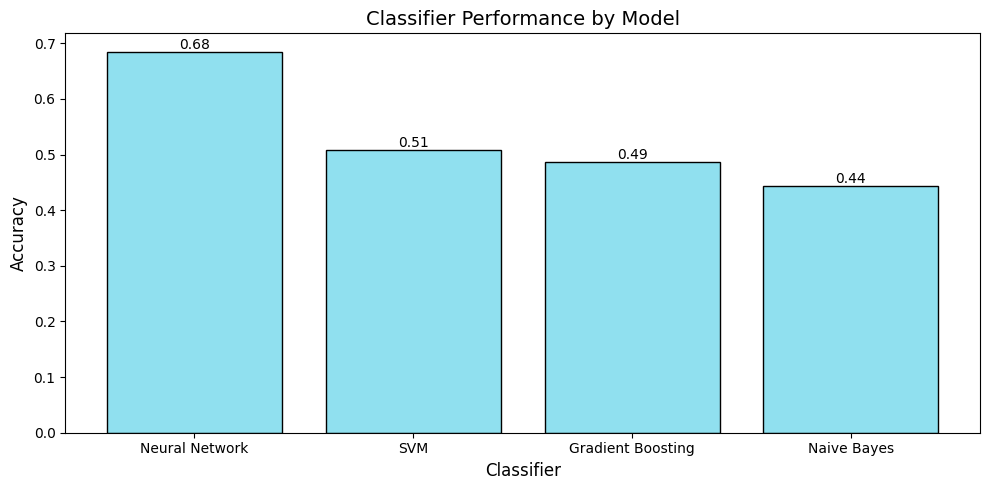

In [30]:
# Calculate the average accuracy per classifier and sort
token_score = model_scores.groupby(['classifier'])['accuracy'].mean().reset_index().sort_values(by='accuracy', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the bar plot
bars = plt.bar(token_score['classifier'], token_score['accuracy'], edgecolor="black", color="#90e0ef")

# Add data labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        bar.get_height(),  # Y-coordinate
        f'{bar.get_height():.2f}',  # Data label with 2 decimal places
        ha='center', va='bottom', fontsize=10  # Alignment and font size
    )

# Add title and labels
plt.title("Classifier Performance by Model", fontsize=14)
plt.xlabel("Classifier", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=0)

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('../images/performance_by_model.png', dpi = 300, bbox_inches = 'tight')
plt.show()


In [21]:
# Group and pivot data
order = ['Neural Network', 'SVM', 'Gradient Boosting', 'Naive Bayes']

token_score = model_scores.groupby(['classifier', 'tokenizer'])['accuracy'].mean().reset_index().sort_values(by='accuracy', ascending=False)
token_pivot = token_score.pivot(index="classifier", columns="tokenizer", values="accuracy")
token_pivot = token_pivot.reindex(order)

features_score = model_scores.groupby(['classifier', 'max_features'])['accuracy'].mean().reset_index().sort_values(by='accuracy', ascending=False)
features_pivot = features_score.pivot(index="classifier", columns="max_features", values="accuracy")
features_pivot = features_pivot.reindex(order)

df_score = model_scores.groupby(['classifier', 'max_df'])['accuracy'].mean().reset_index().sort_values(by='accuracy', ascending=False)
df_pivot = df_score.pivot(index="classifier", columns="max_df", values="accuracy")
df_pivot = df_pivot.reindex(order)

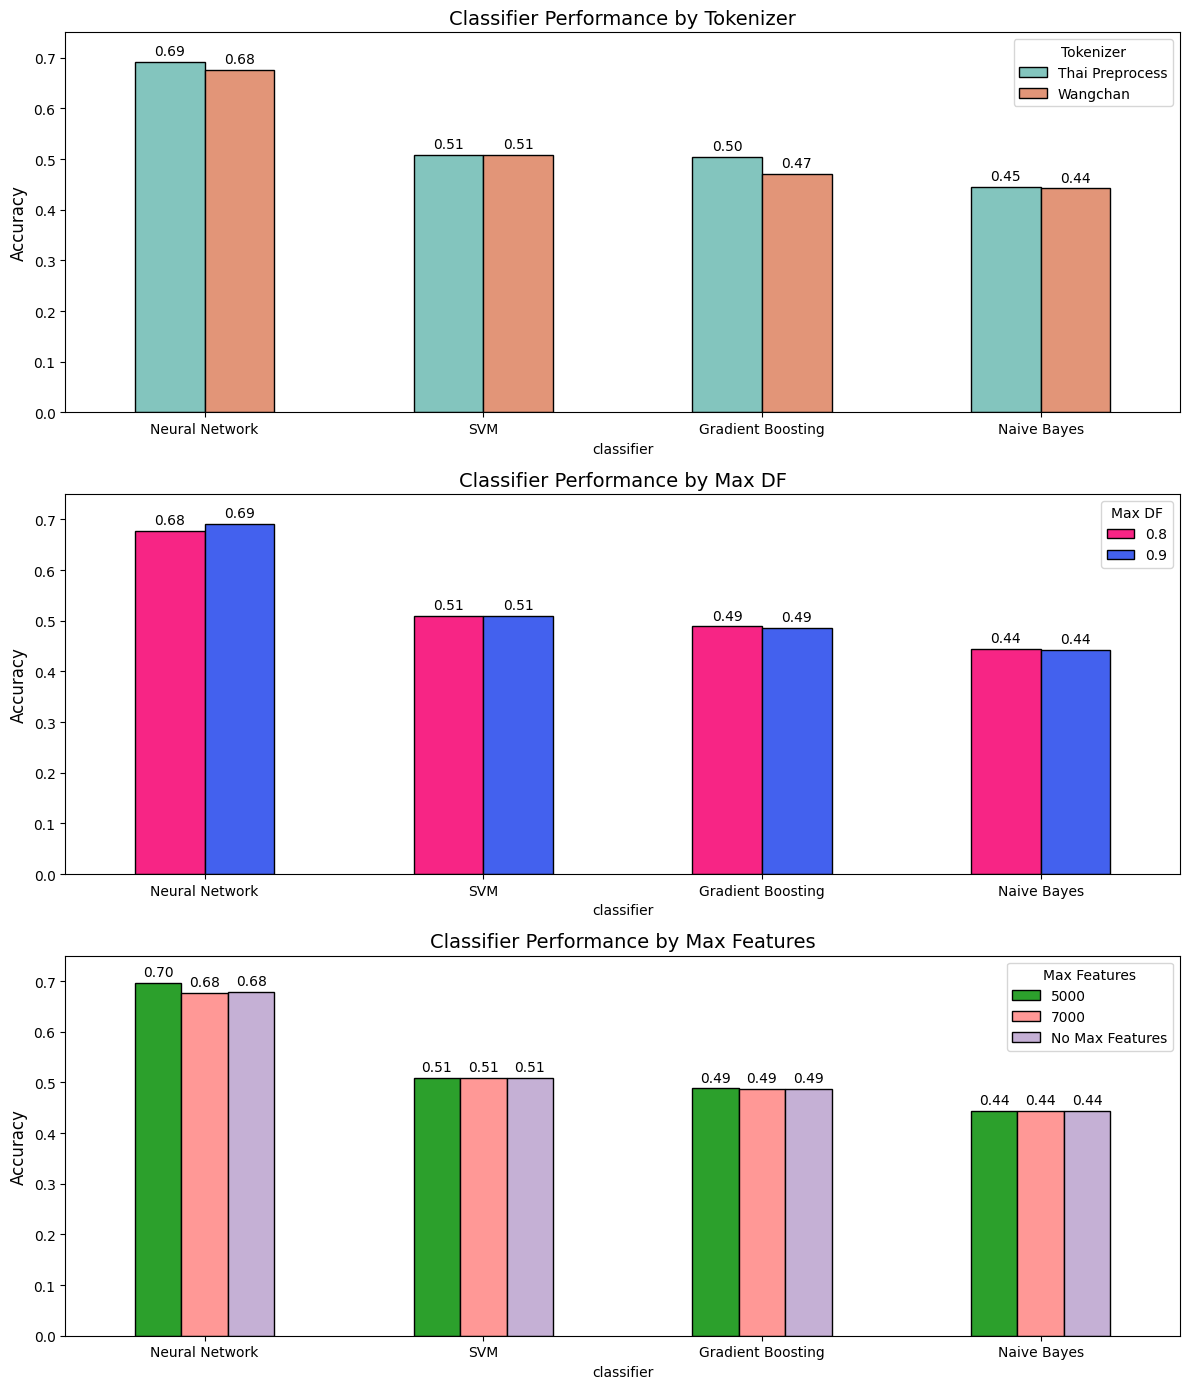

In [36]:
two_colors = ["#83c5be", "#e29578"]  # Set of two colors
three_colors = ["#f72585", "#4361ee"]   # Set of three colors

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 14))

# Chart 1: Tokenizer
token_pivot.plot(kind="bar", ax=axes[0], color=two_colors, edgecolor="black")
axes[0].set_title("Classifier Performance by Tokenizer", fontsize=14)
axes[0].set_ylabel("Accuracy", fontsize=12)
axes[0].legend(title="Tokenizer")
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_ylim(0, 0.75)  # Set y-axis limit

# Add data labels to Chart 1
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     xytext=(0, 5), 
                     textcoords='offset points', 
                     ha='center', fontsize=10)

# Chart 2: Max DF
df_pivot.plot(kind="bar", ax=axes[1], color=two_colors, edgecolor="black")
axes[1].set_title("Classifier Performance by Max DF", fontsize=14)
axes[1].set_ylabel("Accuracy", fontsize=12)
axes[1].legend(title="Max DF")
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_ylim(0, 0.75)  # Set y-axis limit

# Add data labels to Chart 2
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     xytext=(0, 5), 
                     textcoords='offset points', 
                     ha='center', fontsize=10)

# Chart 3: Max Features
features_pivot.plot(kind="bar", ax=axes[2], color=three_colors, edgecolor="black")
axes[2].set_title("Classifier Performance by Max Features", fontsize=14)
axes[2].set_ylabel("Accuracy", fontsize=12)
axes[2].legend(title="Max Features")
axes[2].tick_params(axis='x', rotation=0)
axes[2].set_ylim(0, 0.75)  # Set y-axis limit

# Add data labels to Chart 3
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     xytext=(0, 5), 
                     textcoords='offset points', 
                     ha='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.savefig('../images/performance_by_params.png', dpi=300, bbox_inches='tight')
plt.show()


**Summary: The Neural Network is the best model for performing document classification.**